In this Notebook:

1. [Encoding Ordinal Categorical Features](#Encoding_Ordinal_Categorical_Features) 
2. [Impute Missing Values](#Impute_Missing_Values)
3. [Handling Outliers](#Handling_Outliers)
4. [Standardize a Feature](#Standardize_a_Feature)
5. [Min Max Scaling](#Min_Max_Scaling)
6. [One-Hot Encode Nominal Categorical Features](#One_Hot_Nominal)
7. [Handling Imbalanced Classes](#Handling_Imbalanced_Classes)
8. [Discretize Features](#Discretize_Features)
9. [Box-cox Transformation](#Box_cox_Transformation)
10. [Log Transformation](#Log_Transformation)

# Encoding Ordinal Categorical Features <a id='Encoding_Ordinal_Categorical_Features'></a>

In [ ]:
# Load library
import pandas as pd

In [ ]:
# Create features
df = pd.DataFrame({'Score': ['Low', 
                             'Low', 
                             'Medium', 
                             'Medium', 
                             'High']})

# View data frame
df

In [ ]:
# Create mapper
scale_mapper = {'Low':1, 
                'Medium':2,
                'High':3}

# Map feature values to scale
df['Scale'] = df['Score'].replace(scale_mapper)

# View data frame
df

Encoding Ordinal Categorical Features 


# Impute Missing Values <a id='Impute_Missing_Values'></a>

#### Check for missing values

In [28]:
# check for null
df.isna()

,x0,x1
0,False,False
1,False,True
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [31]:
# number of records that is empty for each column
np.sum(df.isna())

x0    0
x1    1
dtype: int64

In [24]:
# check for null
np.where(np.isnan(df))

(array([1], dtype=int64), array([1], dtype=int64))

#### 1. with mean, median, mode

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [23]:
# Create an empty dataset
df = pd.DataFrame()

# Create two variables called x0 and x1. Make the first value of x1 a missing value
df['x0'] = [0.3051,0.4949,0.6974,0.3769,0.2231,0.341,0.4436,0.5897,0.6308,0.5]
df['x1'] = [0.2654,np.nan,0.2615,0.5846,0.4615,0.8308,0.4962,0.3269,0.5346,0.6731]

# View the dataset
df

,x0,x1
0,0.3051,0.2654
1,0.4949,NaN
2,0.6974,0.2615
3,0.3769,0.5846
4,0.2231,0.4615
5,0.3410,0.8308
6,0.4436,0.4962
7,0.5897,0.3269
8,0.6308,0.5346
9,0.5000,0.6731


In [26]:
# Create an imputer object that looks for 'Nan' values, then replaces them with the mean value of the feature by columns (axis=0)
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Train the imputor on the df dataset
mean_imputer = mean_imputer.fit_transform(df)

#### 2. Fill with any value you feel logical

In [ ]:
# df.fillna()

#### 3. Drop records with missing values

In [ ]:
df.dropna()

#### 4. Imputing Missing Class Labels Using k-Nearest Neighbors

In [ ]:
# Create feature matrix with categorical feature
X = np.array([[0, 2.10, 1.45], 
              [1, 1.18, 1.33], 
              [0, 1.22, 1.27],
              [1, -0.21, -1.19]])

# Predict missing values' class
imputed_values = trained_model.predict(X_with_nan[:,1:])

# Create feature matrix with missing values in the categorical feature
X_with_nan = np.array([[np.nan, 0.87, 1.31], 
                       [np.nan, -0.67, -0.22]])

# Train KNN learner
clf = KNeighborsClassifier(3, weights='distance')
trained_model = clf.fit(X[:,1:], X[:,0])

# Join column of predicted class with their other features
X_with_imputed = np.hstack((imputed_values.reshape(-1,1), X_with_nan[:,1:]))

# Join two feature matrices
np.vstack((X_with_imputed, X))

# Handling Outliers <a id='Handling_Outliers'></a>

#### 1. Standard Deviation Method
If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers.

In [ ]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

####  2. Interquartile Range Method

Not all data is normal or normal enough to treat it as being drawn from a Gaussian distribution.

A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short.

The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

In [ ]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

#### 3. Drop outliers using a threshold you define or flag them

In [ ]:
# Create DataFrame
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]

In [ ]:
# Drop observations greater than some value
houses[houses['Bathrooms'] < 20]

In [ ]:
# Create feature based on boolean condition
houses['Outlier'] = np.where(houses['Bathrooms'] < 20, 0, 1)

# Show data
houses

#### 4. Rescale using log transformation

outliers won't have same effect after log transformation

In [ ]:
# Create DataFrame
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]

# Log feature
houses['Log_Of_Square_Feet'] = [np.log(x) for x in houses['Square_Feet']]

# Show data
houses

#### 5. DBSCAN
#### 6. Isolation Forest
#### 7. Minimum Covariance Determinant (Elliptic Envelope)
#### 8. Local Outlier Factor


# Standardize a Feature <a id='Standardize_a_Feature'></a>

In [ ]:
# Load libraries
from sklearn import preprocessing
import numpy as np

In [ ]:
# Create feature
x = np.array([[-500.5], 
              [-100.1], 
              [0], 
              [100.1], 
              [900.9]])

In [ ]:
# Create scaler
scaler = preprocessing.StandardScaler()

# Transform the feature
standardized = scaler.fit_transform(x)

# Show feature
standardized

# Min-Max Scaling <a id='Min_Max_Scaling'></a>

In [ ]:
# Load libraries
from sklearn import preprocessing
import numpy as np

In [ ]:
# Create feature
x = np.array([[-500.5], 
              [-100.1], 
              [0], 
              [100.1], 
              [900.9]])

In [ ]:
# Create scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Scale feature
x_scale = minmax_scale.fit_transform(x)

# Show feature
x_scale

# One-Hot Encode Nominal Categorical Features <a id='One_Hot_Nominal'></a>

### 1. using sklearn library

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Create NumPy array
x = np.array([['Texas'], 
              ['California'], 
              ['Texas'], 
              ['Delaware'], 
              ['Texas']])

# Create LabelBinzarizer object
one_hot = OneHotEncoder()

# One-hot encode data
one_hot.fit_transform(x)

# View classes
print(x)
one_hot.categories_

### 2. using pandas

In [ ]:
# Create NumPy array
x = np.array([['Texas'], 
              ['California'], 
              ['Texas'], 
              ['Delaware'], 
              ['Texas']])
# Dummy feature
pd.get_dummies(x[:,0])

# Handling Imbalanced Classes <a id='Handling_Imbalanced_Classes'></a>


#### 1. With Upsampling

In [ ]:
# Load libraries
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
# Load iris data
iris = load_iris()

# Create feature matrix
X = iris.data

# Create target vector
y = iris.target

In [ ]:
# Make Iris Dataset Imbalanced
# Remove first 40 observations
X = X[40:,:]
y = y[40:]

# Create binary target vector indicating if class 0
y = np.where((y == 0), 0, 1)

# Look at the imbalanced target vector
y

In [ ]:
#Upsampling Minority Class To Match Majority
# Indicies of each class' observations
i_class0 = np.where(y == 0)[0]
i_class1 = np.where(y == 1)[0]

# Number of observations in each class
n_class0 = len(i_class0)
n_class1 = len(i_class1)

# For every observation in class 1, randomly sample from class 0 with replacement
i_class0_upsampled = np.random.choice(i_class0, size=n_class1, replace=True)

# Join together class 0's upsampled target vector with class 1's target vector
np.concatenate((y[i_class0_upsampled], y[i_class1]))

#### 2. With Downsampling

In [ ]:
# Load libraries
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
# Load iris data
iris = load_iris()

# Create feature matrix
X = iris.data

# Create target vector
y = iris.target

In [ ]:
# Make Iris Dataset Imbalanced
# Remove first 40 observations
X = X[40:,:]
y = y[40:]

# Create binary target vector indicating if class 0
y = np.where((y == 0), 0, 1)

# Look at the imbalanced target vector
y

In [ ]:
# Downsample Majority Class To Match Minority Class
# Indicies of each class' observations
i_class0 = np.where(y == 0)[0]
i_class1 = np.where(y == 1)[0]

# Number of observations in each class
n_class0 = len(i_class0)
n_class1 = len(i_class1)

# For every observation of class 0, randomly sample from class 1 without replacement
i_class1_downsampled = np.random.choice(i_class1, size=n_class0, replace=False)

# Join together class 0's target vector with the downsampled class 1's target vector
np.hstack((y[i_class0], y[i_class1_downsampled]))

#### 3. Using SMOTE Technique

#### 4. Adjusting class weights for cost-sensitive learning 

# Discretize Features <a id='Discretize_Features'></a>

In [ ]:
# Load libraries
from sklearn.preprocessing import Binarizer
import numpy as np

In [ ]:
# Create feature
age = np.array([[6], 
                [12], 
                [20], 
                [36], 
                [65]])

#### 1.  Binarize Feature

In [ ]:
# Create binarizer
binarizer = Binarizer(18)

# Transform feature
binarizer.fit_transform(age)

#### 2. Break Up Feature Into Bins

In [ ]:
# Bin feature
np.digitize(age, bins=[20,30,64])

# Box-cox Transformation <a id='Box_cox_Transformation'></a>

Lambda value used for Transformation: 0.21291278962667246


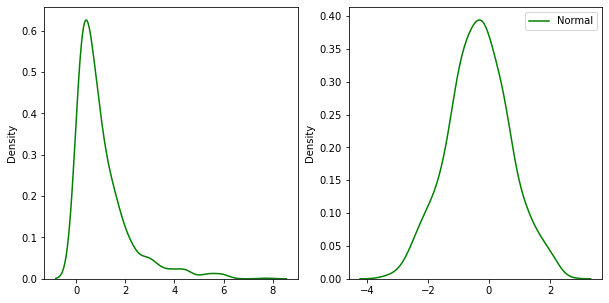

In [42]:
# import modules
import numpy as np
from scipy import stats
  
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
  
# generate non-normal data (exponential)
original_data = np.random.exponential(size = 1000)
  
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.kdeplot(original_data, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.kdeplot(fitted_data, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

**Does Box-cox always work?**

The answer is NO. Box-cox does not guarantee normality because it never checks for the normality which is necessary to be foolproof that it has correctly transformed the non-normal distribution or not. It only checks for the smallest Standard deviation.

Therefore, it is absolutely necessary to always check the transformed data for normality using a probability plot.

# Log-Transformation <a id='Log_Transformation'></a>

a special case case of Box-cox transformation when lambda=0

Lambda value used for Transformation: 0


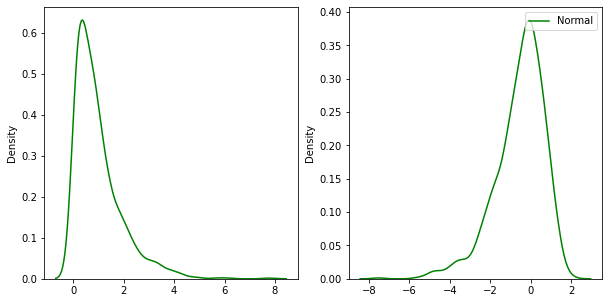

In [49]:
# import modules
import numpy as np
from scipy import stats
  
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
  
# generate non-normal data (exponential)
original_data = np.random.exponential(size = 1000)
  
# transform training data & save lambda value
fitted_data = stats.boxcox(original_data, lmbda=0)
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.kdeplot(original_data, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.kdeplot(fitted_data, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {0}")

# Univariate Data Visualization

# Bivariate Data Visualization